Лабораторная работа №2, Вариант 11

Цель работы: изучить программные средства, используемые для визуализации
наборов данных.

Выполнение работы
Следует получить у преподавателя индивидуальный вариант задания, связанного
с анализом данных конкретной предметной области. Файл данных находится либо в
облачном ресурсе, либо в сети. Необходимо подключить этот файл, скачать оттуда
данные в свой ноутбук Jupyter, поместить данные в объект DataFrame и провести
первичный анализ данных в заданной предметной области.
Особое внимание следует уделить графическому представлению распределений
признаков, визуализации взаимосвязей, позволяющие судить о наборе данных.
Построение графиков желательно произвести по нескольким проекциям. При анализе
данных использовать как можно более разнообразные типы графиков.

Датасет – juice.csv
1. Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Настройка стиля графиков
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

2. Загрузка данных

In [2]:
juice_df = pd.read_csv('juice.csv')

# Первичный анализ
print("Первые 10 строк данных о соке:")
display(juice_df.head(10))

print(f"\nРазмер данных: {juice_df.shape}")
print(f"Столбцы: {list(juice_df.columns)}")

print("\nИнформация о данных:")
juice_df.info()

print("\nСтатистическое описание:")
display(juice_df.describe())

Первые 10 строк данных о соке:


,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
5,6,CH,230,7,1.69,1.99,0.00,0.0,0,1,0.965228,1.99,1.69,0.30,Yes,0.000000,0.000000,0.30,0
6,7,CH,232,7,1.69,1.99,0.00,0.4,1,1,0.972182,1.59,1.69,-0.10,Yes,0.201005,0.000000,0.30,0
7,8,CH,234,7,1.75,1.99,0.00,0.4,1,0,0.977746,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0
8,9,CH,235,7,1.75,1.99,0.00,0.4,0,0,0.982197,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0
9,10,CH,238,7,1.75,1.99,0.00,0.4,0,0,0.985757,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0



Размер данных: (1070, 19)
Столбцы: ['Id', 'Purchase', 'WeekofPurchase', 'StoreID', 'PriceCH', 'PriceMM', 'DiscCH', 'DiscMM', 'SpecialCH', 'SpecialMM', 'LoyalCH', 'SalePriceMM', 'SalePriceCH', 'PriceDiff', 'Store7', 'PctDiscMM', 'PctDiscCH', 'ListPriceDiff', 'STORE']

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1070 non-null   int64  
 1   Purchase        1070 non-null   object 
 2   WeekofPurchase  1070 non-null   int64  
 3   StoreID         1070 non-null   int64  
 4   PriceCH         1070 non-null   float64
 5   PriceMM         1070 non-null   float64
 6   DiscCH          1070 non-null   float64
 7   DiscMM          1070 non-null   float64
 8   SpecialCH       1070 non-null   int64  
 9   SpecialMM       1070 non-null   int64  
 10  LoyalCH         1070 non-null   float64
 11  SalePriceMM  

,Id,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,535.500000,254.381308,3.959813,1.867421,2.085411,0.051860,0.123364,0.147664,0.161682,0.565782,1.962047,1.815561,0.146486,0.059298,0.027314,0.217991,1.630841
std,309.026698,15.558286,2.308984,0.101970,0.134386,0.117474,0.213834,0.354932,0.368331,0.307843,0.252697,0.143384,0.271563,0.101760,0.062232,0.107535,1.430387
min,1.000000,227.000000,1.000000,1.690000,1.690000,0.000000,0.000000,0.000000,0.000000,0.000011,1.190000,1.390000,-0.670000,0.000000,0.000000,0.000000,0.000000
25%,268.250000,240.000000,2.000000,1.790000,1.990000,0.000000,0.000000,0.000000,0.000000,0.325257,1.690000,1.750000,0.000000,0.000000,0.000000,0.140000,0.000000
50%,535.500000,257.000000,3.000000,1.860000,2.090000,0.000000,0.000000,0.000000,0.000000,0.600000,2.090000,1.860000,0.230000,0.000000,0.000000,0.240000,2.000000
75%,802.750000,268.000000,7.000000,1.990000,2.180000,0.000000,0.230000,0.000000,0.000000,0.850873,2.130000,1.890000,0.320000,0.112676,0.000000,0.300000,3.000000
max,1070.000000,278.000000,7.000000,2.090000,2.290000,0.500000,0.800000,1.000000,1.000000,0.999947,2.290000,2.090000,0.640000,0.402010,0.252688,0.440000,4.000000


3. Распределение целевой переменной

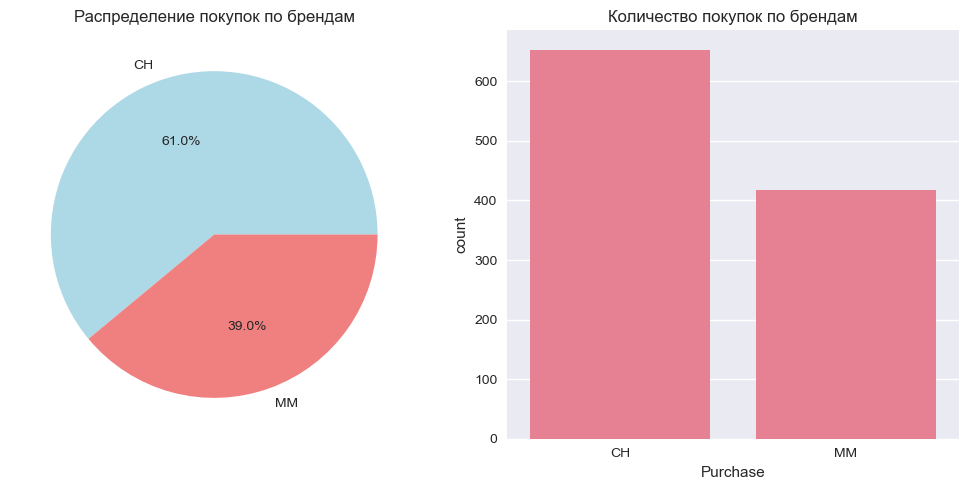

Распределение покупок:
Purchase
CH    653
MM    417
Name: count, dtype: int64


In [3]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
purchase_counts = juice_df['Purchase'].value_counts()
plt.pie(purchase_counts.values, labels=purchase_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Распределение покупок по брендам')

plt.subplot(1, 2, 2)
sns.countplot(data=juice_df, x='Purchase')
plt.title('Количество покупок по брендам')

plt.tight_layout()
plt.show()

print("Распределение покупок:")
print(purchase_counts)

4. Анализ цен и скидок

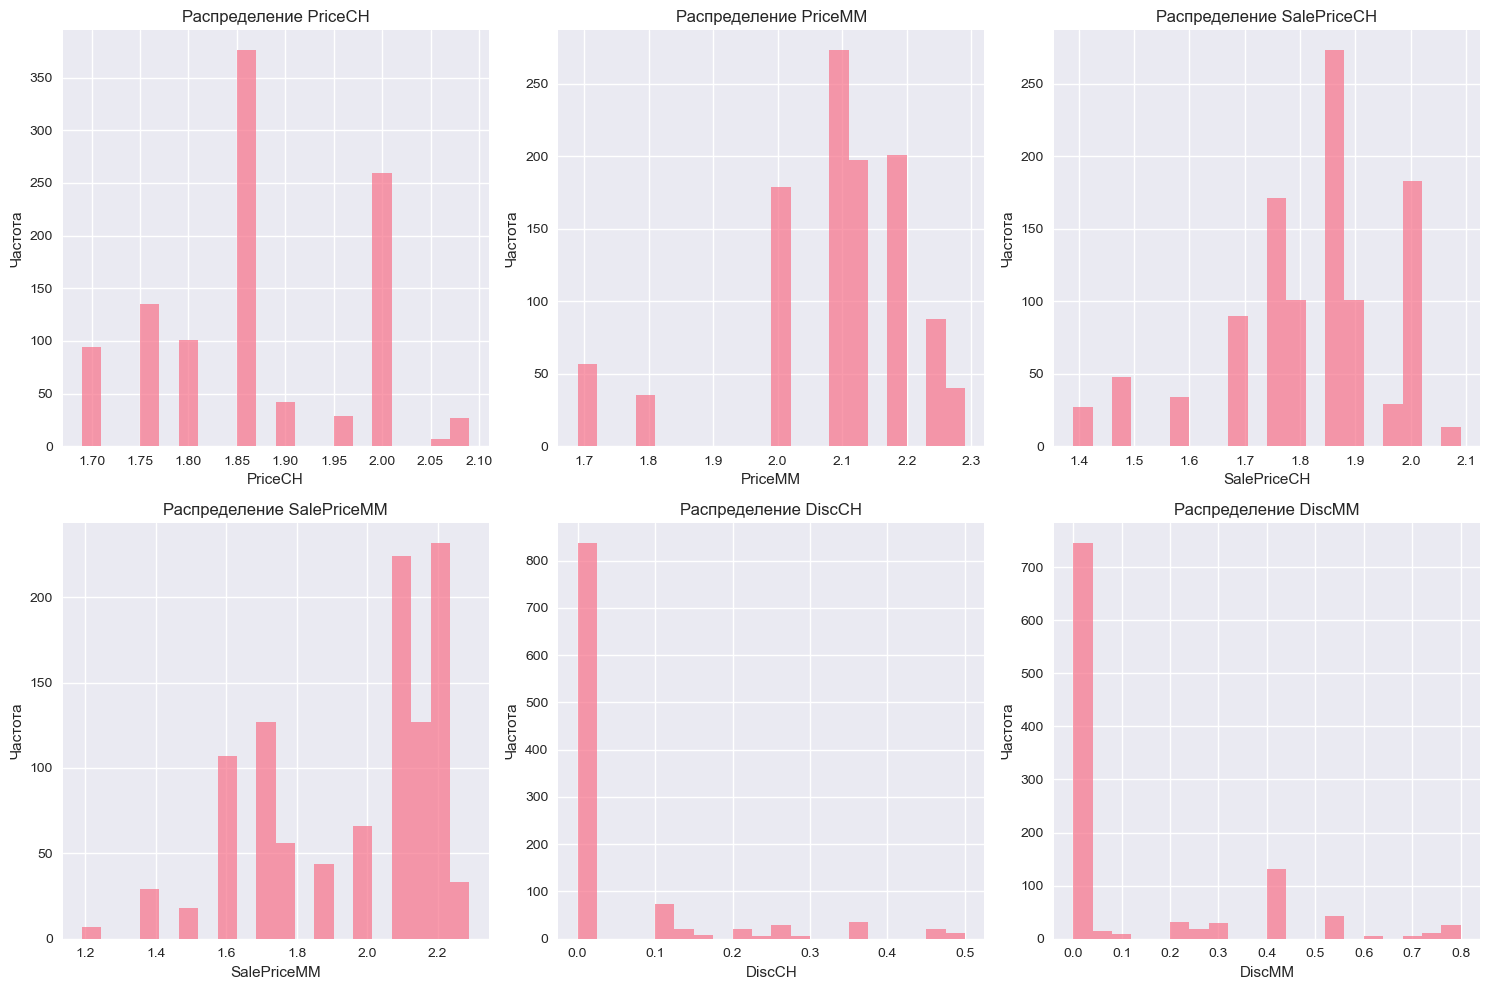

In [4]:
price_columns = ['PriceCH', 'PriceMM', 'SalePriceCH', 'SalePriceMM', 'DiscCH', 'DiscMM']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(price_columns):
    juice_df[col].hist(bins=20, ax=axes[i], alpha=0.7)
    axes[i].set_title(f'Распределение {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Частота')

plt.tight_layout()
plt.show()

5. Распределение целевой переменной

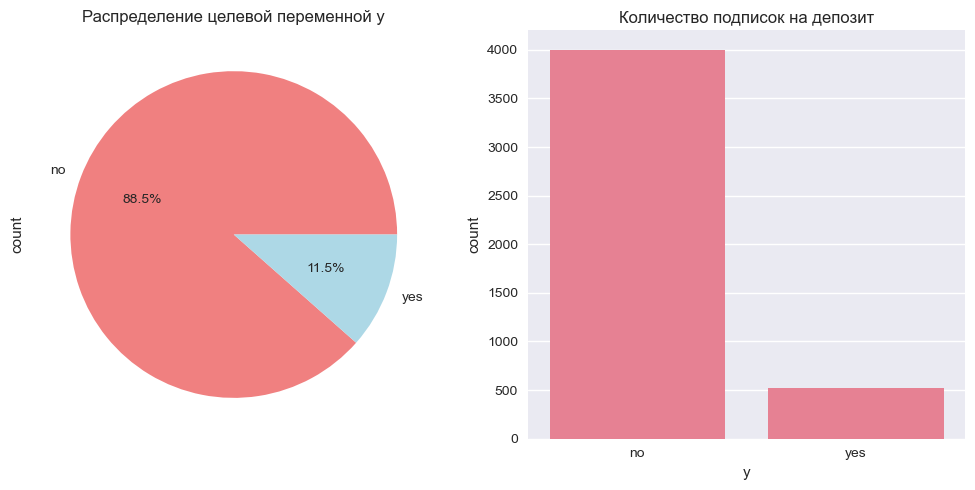

In [7]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
df['y'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Распределение целевой переменной y')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='y')
plt.title('Количество подписок на депозит')

plt.tight_layout()
plt.show()

6. Сравнение цен между брендами

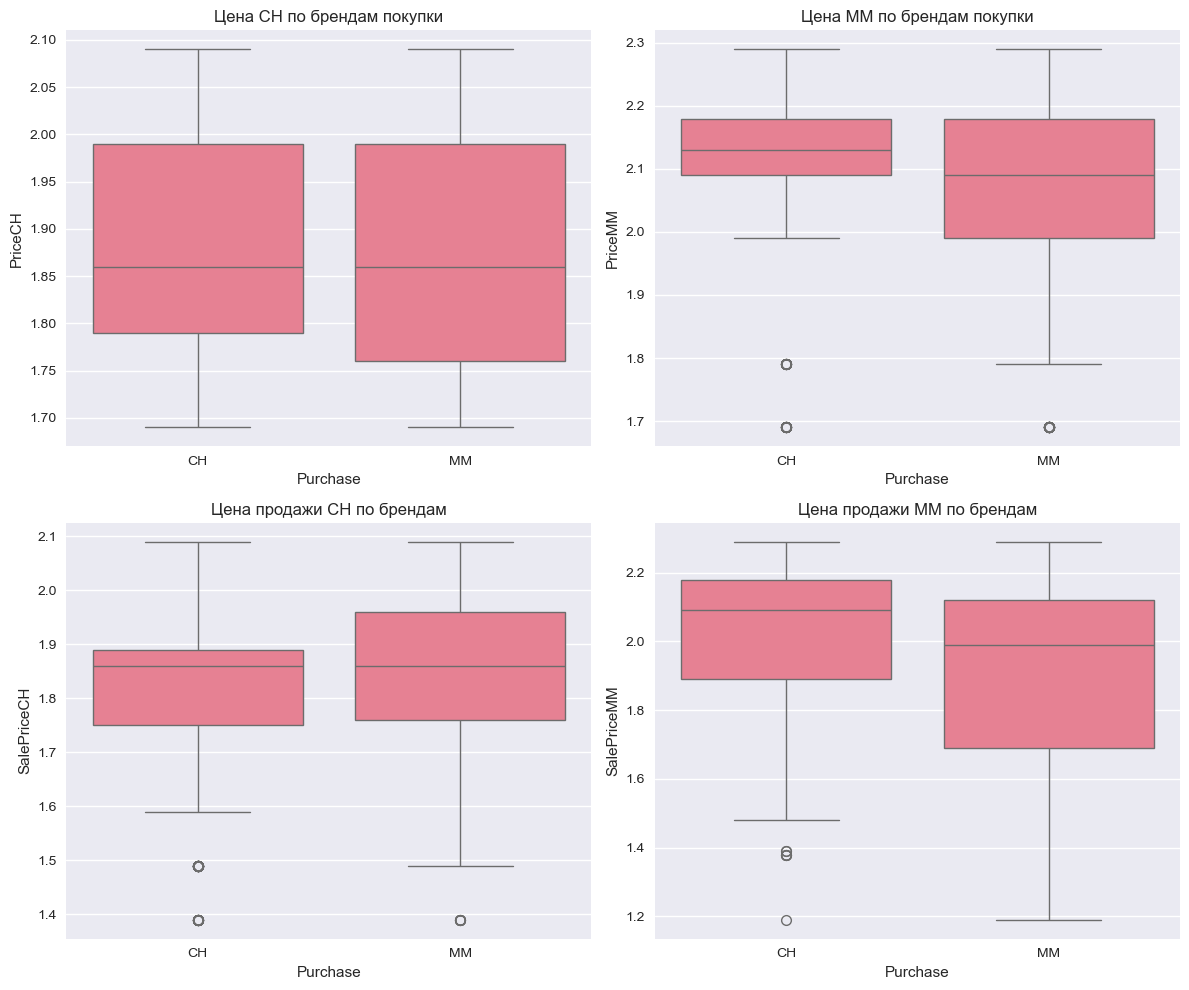

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Цены по брендам
sns.boxplot(data=juice_df, x='Purchase', y='PriceCH', ax=axes[0,0])
axes[0,0].set_title('Цена CH по брендам покупки')

sns.boxplot(data=juice_df, x='Purchase', y='PriceMM', ax=axes[0,1])
axes[0,1].set_title('Цена MM по брендам покупки')

# Цены продажи
sns.boxplot(data=juice_df, x='Purchase', y='SalePriceCH', ax=axes[1,0])
axes[1,0].set_title('Цена продажи CH по брендам')

sns.boxplot(data=juice_df, x='Purchase', y='SalePriceMM', ax=axes[1,1])
axes[1,1].set_title('Цена продажи MM по брендам')

plt.tight_layout()
plt.show()

7. Анализ скидок и лояльности

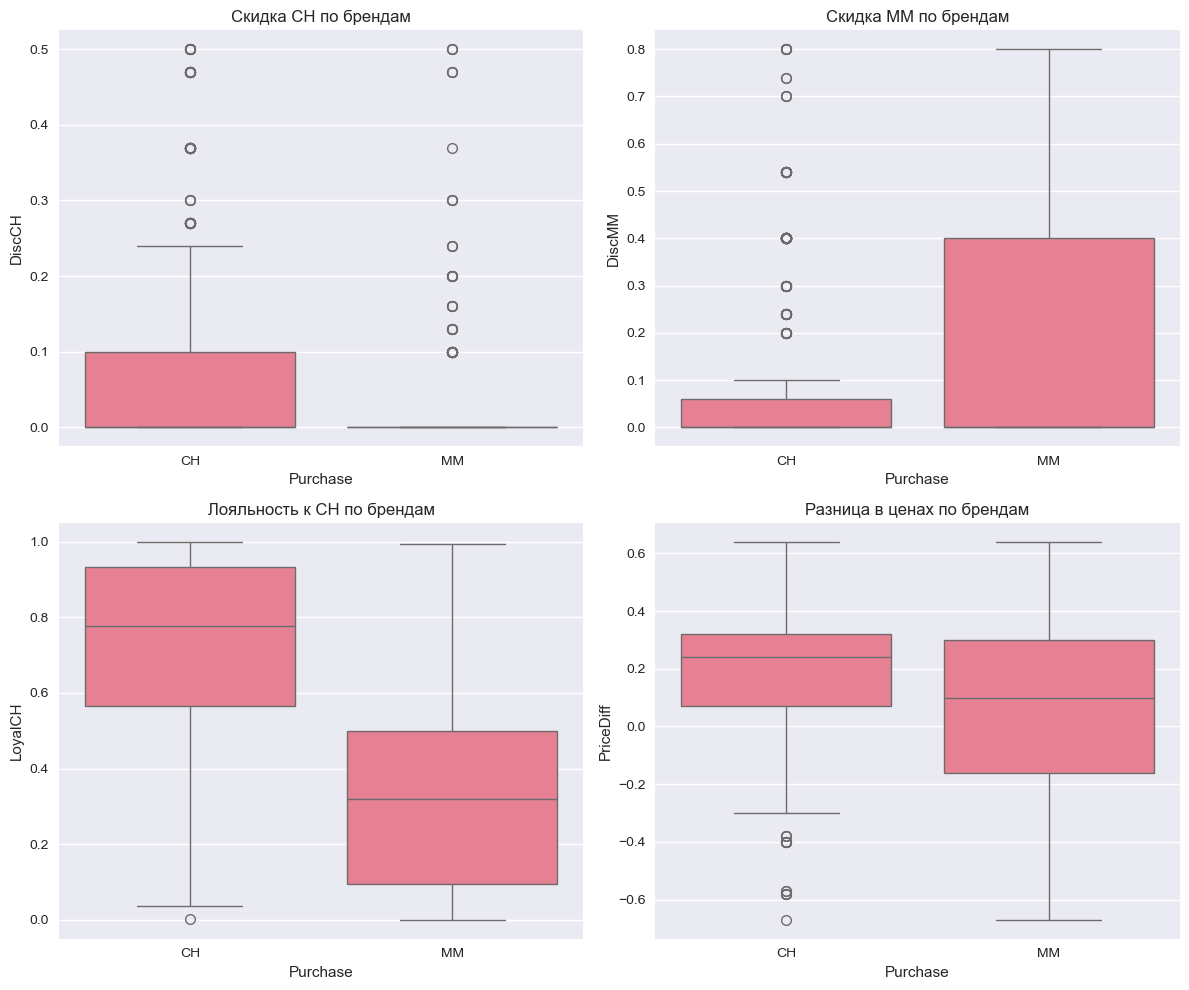

In [12]:
ig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Скидки
sns.boxplot(data=juice_df, x='Purchase', y='DiscCH', ax=axes[0,0])
axes[0,0].set_title('Скидка CH по брендам')

sns.boxplot(data=juice_df, x='Purchase', y='DiscMM', ax=axes[0,1])
axes[0,1].set_title('Скидка MM по брендам')

# Лояльность
sns.boxplot(data=juice_df, x='Purchase', y='LoyalCH', ax=axes[1,0])
axes[1,0].set_title('Лояльность к CH по брендам')

# Используем существующий столбец вместо Price Diff
# Если есть столбец с разницей цен, используем его, иначе создадим
if 'PriceDiff' in juice_df.columns:
    sns.boxplot(data=juice_df, x='Purchase', y='PriceDiff', ax=axes[1,1])
    axes[1,1].set_title('Разница в ценах по брендам')
else:
    # Создаем разницу в ценах
    juice_df['PriceDiff'] = juice_df['PriceCH'] - juice_df['PriceMM']
    sns.boxplot(data=juice_df, x='Purchase', y='PriceDiff', ax=axes[1,1])
    axes[1,1].set_title('Разница в ценах (CH - MM) по брендам')

plt.tight_layout()
plt.show()

8. Анализ по магазинам

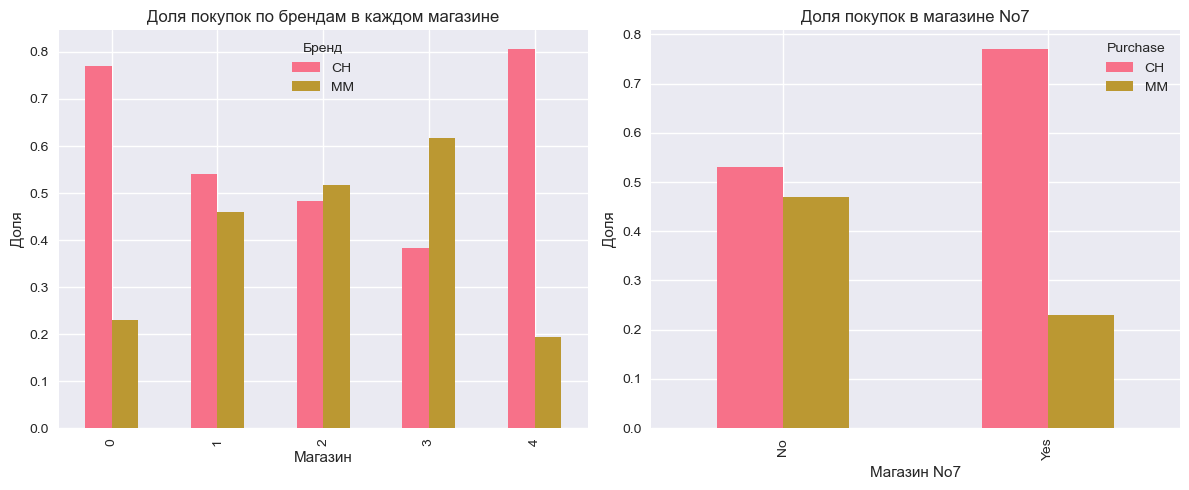

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Распределение по магазинам
store_purchase = pd.crosstab(juice_df['STORE'], juice_df['Purchase'], normalize='index')
store_purchase.plot(kind='bar', ax=axes[0])
axes[0].set_title('Доля покупок по брендам в каждом магазине')
axes[0].set_xlabel('Магазин')
axes[0].set_ylabel('Доля')
axes[0].legend(title='Бренд')

# Store 7 анализ
store7_purchase = pd.crosstab(juice_df['Store7'], juice_df['Purchase'], normalize='index')
store7_purchase.plot(kind='bar', ax=axes[1])
axes[1].set_title('Доля покупок в магазине No7')
axes[1].set_xlabel('Магазин No7')
axes[1].set_ylabel('Доля')

plt.tight_layout()
plt.show()

9. Процентные скидки

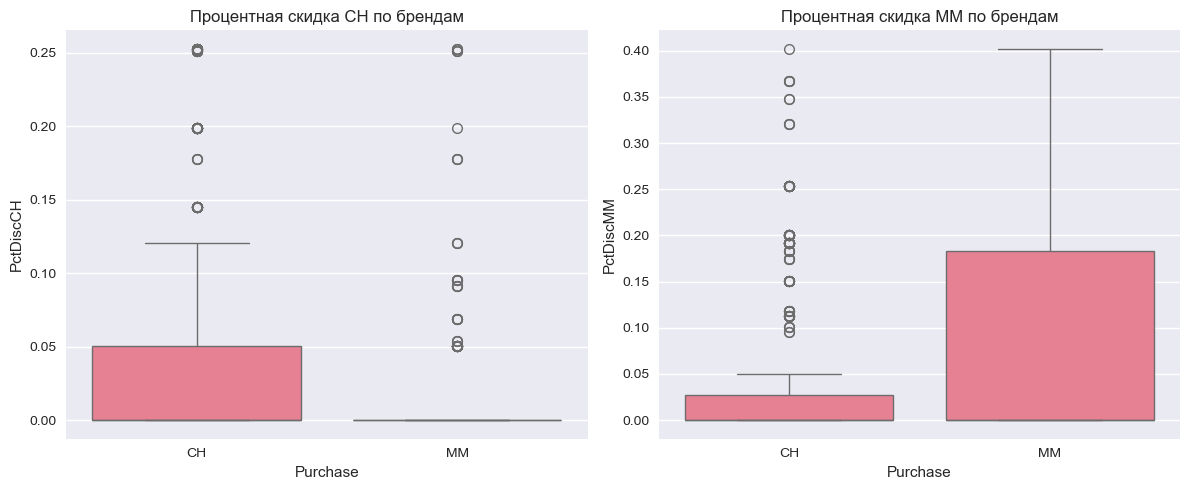

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=juice_df, x='Purchase', y='PctDiscCH', ax=axes[0])
axes[0].set_title('Процентная скидка CH по брендам')

sns.boxplot(data=juice_df, x='Purchase', y='PctDiscMM', ax=axes[1])
axes[1].set_title('Процентная скидка MM по брендам')

plt.tight_layout()
plt.show()

10. Корреляционный анализ

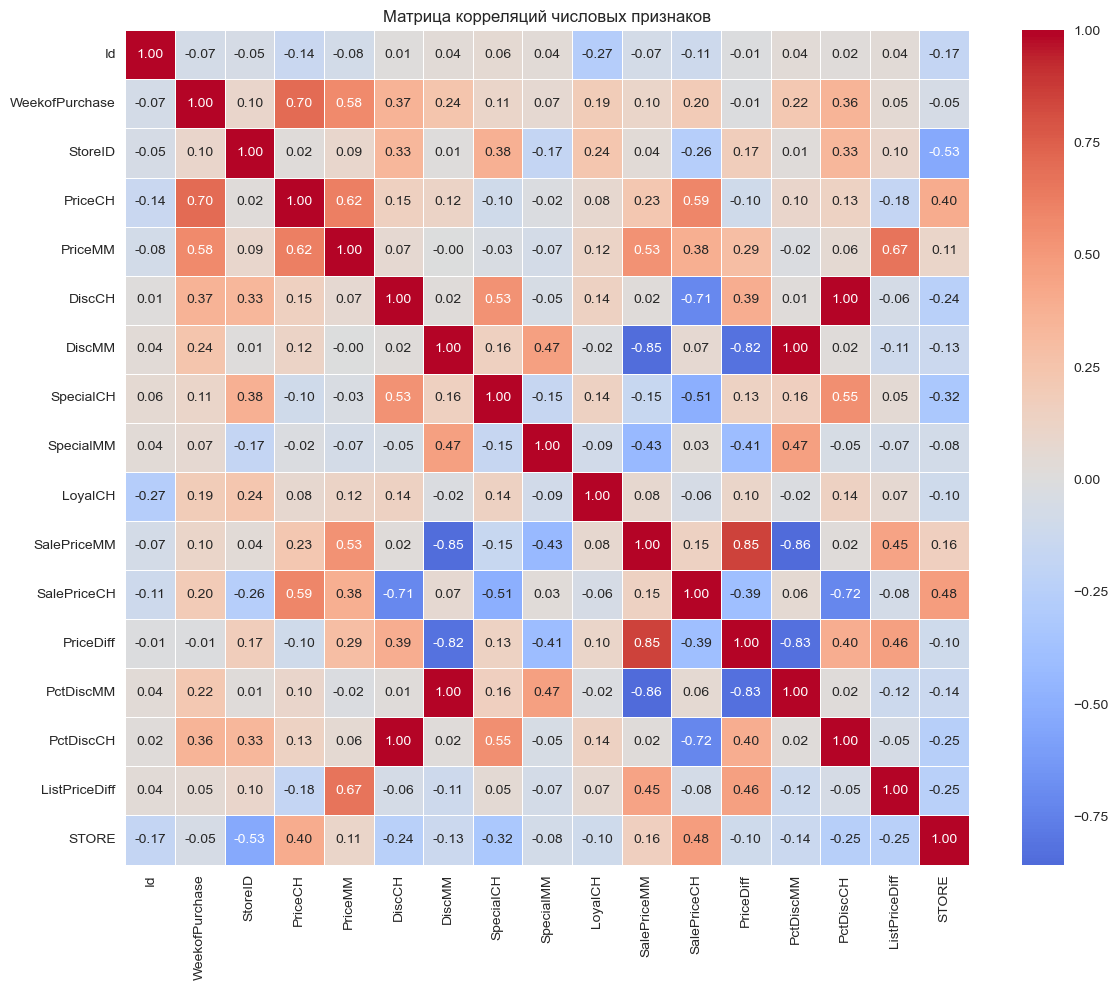

In [9]:
numeric_columns = juice_df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 10))
correlation_matrix = juice_df[numeric_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=0.5)
plt.title('Матрица корреляций числовых признаков')
plt.tight_layout()
plt.show()

11. Анализ факторов, влияющих на покупку

Используемые признаки: ['PriceCH', 'PriceMM', 'DiscCH', 'DiscMM', 'LoyalCH', 'SalePriceMM', 'SalePriceCH', 'PriceDiff', 'PctDiscMM', 'PctDiscCH', 'ListPriceDiff', 'Store7_encoded']


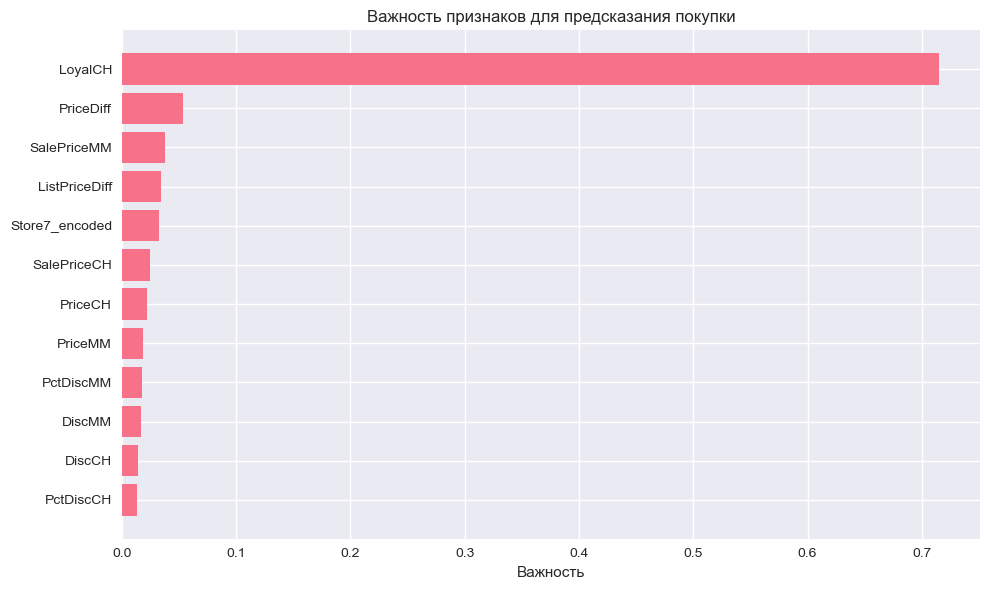

Топ-5 самых важных признаков:


,feature,importance
11,Store7_encoded,0.032402
10,ListPriceDiff,0.034405
5,SalePriceMM,0.037870
7,PriceDiff,0.053943
4,LoyalCH,0.715167


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Создаем недостающие столбцы если их нет
if 'PriceDiff' not in juice_df.columns:
    juice_df['PriceDiff'] = juice_df['PriceCH'] - juice_df['PriceMM']

if 'ListPriceDiff' not in juice_df.columns:
    juice_df['ListPriceDiff'] = juice_df['PriceMM'] - juice_df['PriceCH']

# Подготовка данных для анализа важности признаков
juice_encoded = juice_df.copy()
le = LabelEncoder()
juice_encoded['Purchase_encoded'] = le.fit_transform(juice_df['Purchase'])
juice_encoded['Store7_encoded'] = le.fit_transform(juice_df['Store7'])

# Выбираем числовые признаки для анализа (только существующие)
existing_columns = [col for col in ['PriceCH', 'PriceMM', 'DiscCH', 'DiscMM', 'LoyalCH', 
                   'SalePriceMM', 'SalePriceCH', 'PriceDiff', 'PctDiscMM', 
                   'PctDiscCH', 'ListPriceDiff', 'Store7_encoded'] 
                   if col in juice_encoded.columns]

print(f"Используемые признаки: {existing_columns}")

X = juice_encoded[existing_columns]
y = juice_encoded['Purchase_encoded']

# Обучаем модель для определения важности признаков
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Визуализация важности признаков
feature_importance = pd.DataFrame({
    'feature': existing_columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.title('Важность признаков для предсказания покупки')
plt.xlabel('Важность')
plt.tight_layout()
plt.show()

print("Топ-5 самых важных признаков:")
display(feature_importance.tail(5))

12. Анализ профессий и образования

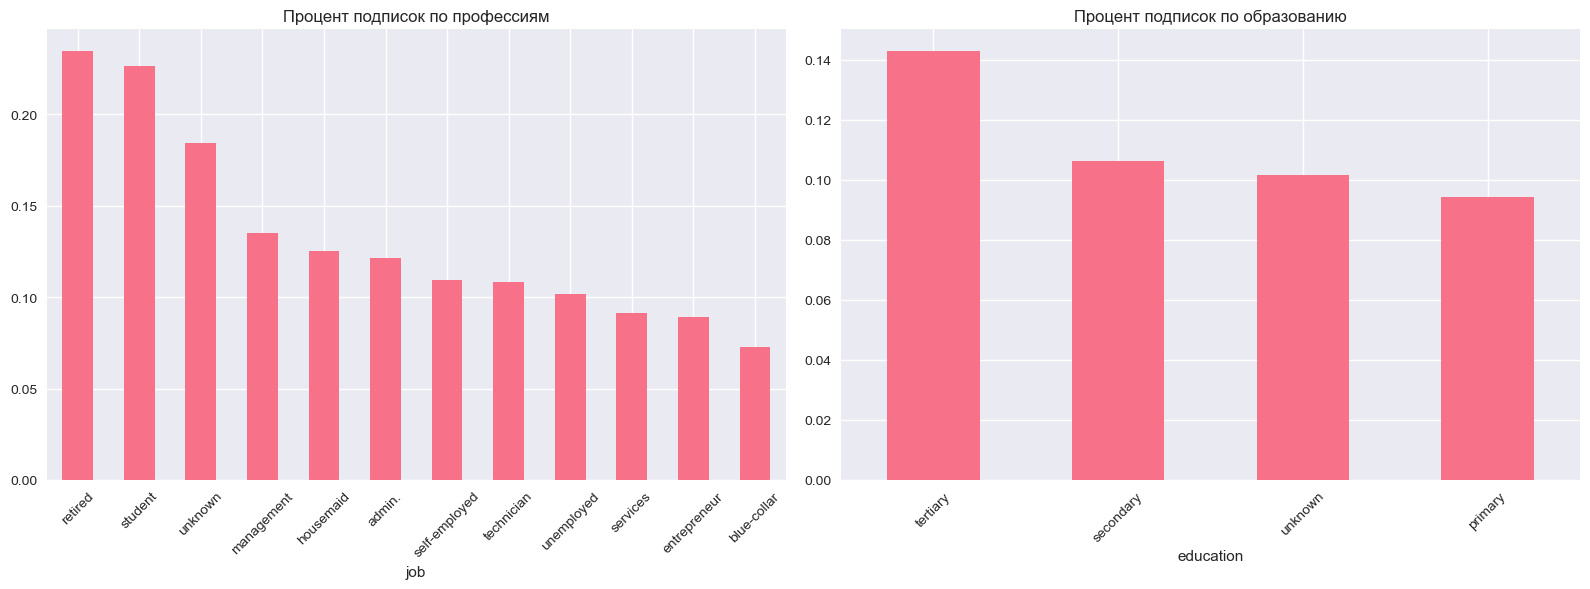

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Профессии с наибольшим процентом подписок
job_success = pd.crosstab(df['job'], df['y'], normalize='index')
job_success['yes'].sort_values(ascending=False).plot(kind='bar', ax=axes[0])
axes[0].set_title('Процент подписок по профессиям')
axes[0].tick_params(axis='x', rotation=45)

# Образование с наибольшим процентом подписок
edu_success = pd.crosstab(df['education'], df['y'], normalize='index')
edu_success['yes'].sort_values(ascending=False).plot(kind='bar', ax=axes[1])
axes[1].set_title('Процент подписок по образованию')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

13. Анализ результатов предыдущих кампаний

<Figure size 1000x600 with 0 Axes>

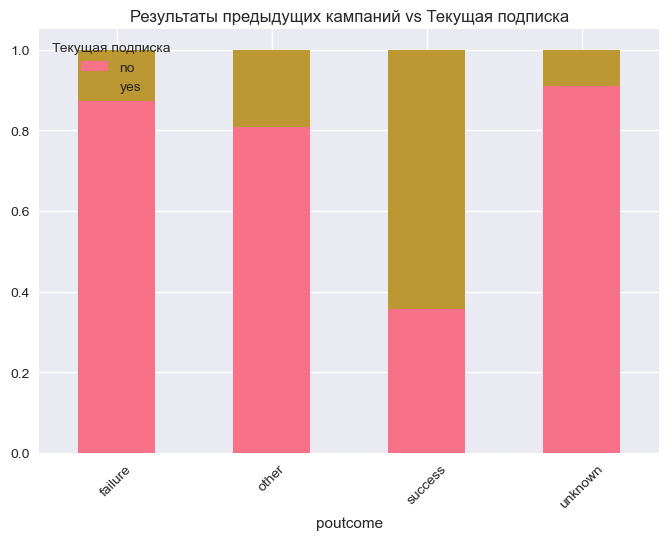

In [15]:
plt.figure(figsize=(10, 6))
poutcome_analysis = pd.crosstab(df['poutcome'], df['y'], normalize='index')
poutcome_analysis.plot(kind='bar', stacked=True)
plt.title('Результаты предыдущих кампаний vs Текущая подписка')
plt.xticks(rotation=45)
plt.legend(title='Текущая подписка')
plt.show()

14. Детальный анализ ключевых факторов

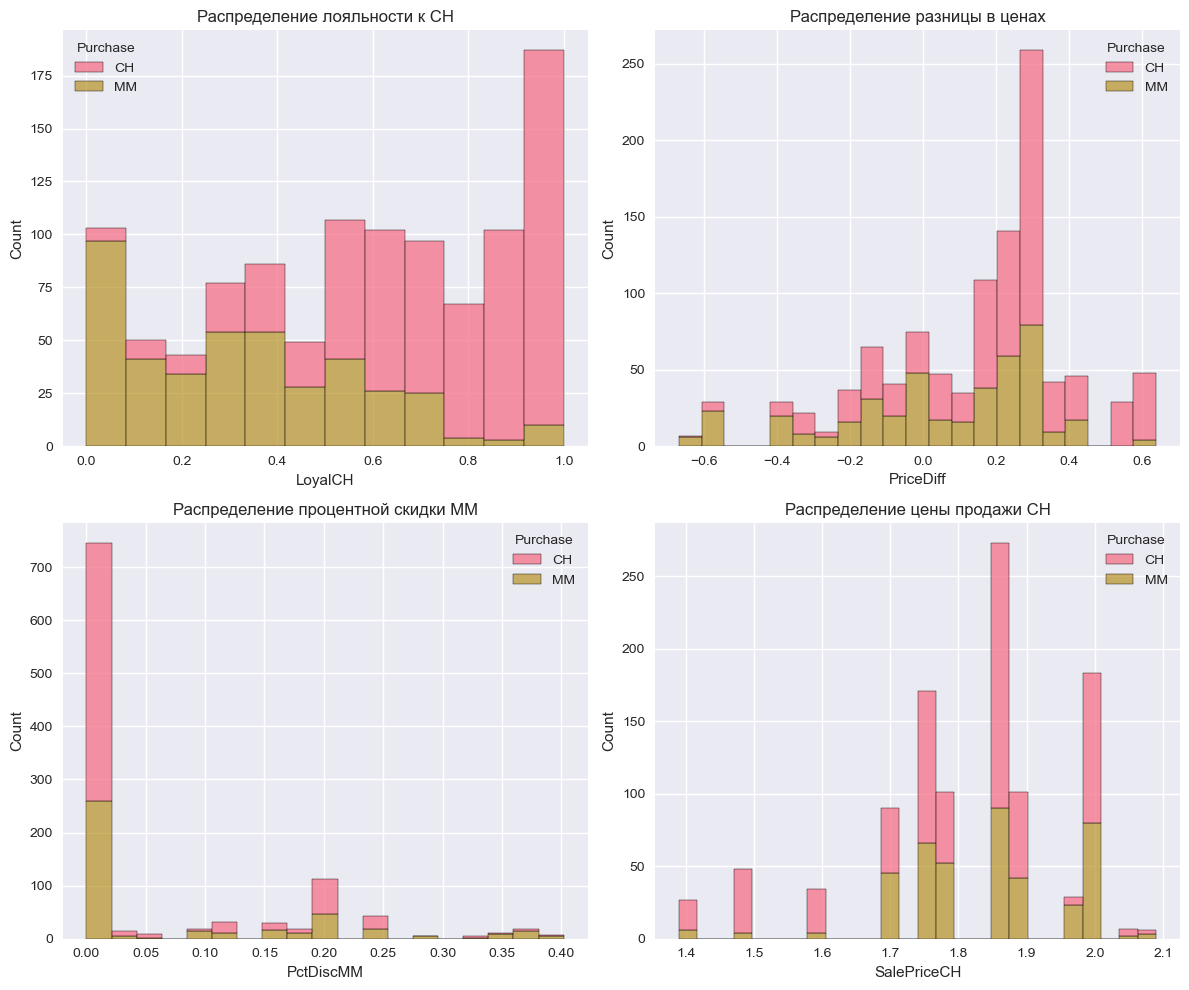

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Лояльность к CH
sns.histplot(data=juice_df, x='LoyalCH', hue='Purchase', multiple="stack", ax=axes[0,0])
axes[0,0].set_title('Распределение лояльности к CH')

# Используем созданный PriceDiff
sns.histplot(data=juice_df, x='PriceDiff', hue='Purchase', multiple="stack", ax=axes[0,1])
axes[0,1].set_title('Распределение разницы в ценах')

# Процентная скидка MM
sns.histplot(data=juice_df, x='PctDiscMM', hue='Purchase', multiple="stack", ax=axes[1,0])
axes[1,0].set_title('Распределение процентной скидки MM')

# Цена продажи CH
sns.histplot(data=juice_df, x='SalePriceCH', hue='Purchase', multiple="stack", ax=axes[1,1])
axes[1,1].set_title('Распределение цены продажи CH')

plt.tight_layout()
plt.show()

15. Сводная таблица и тепловая карта лояльности

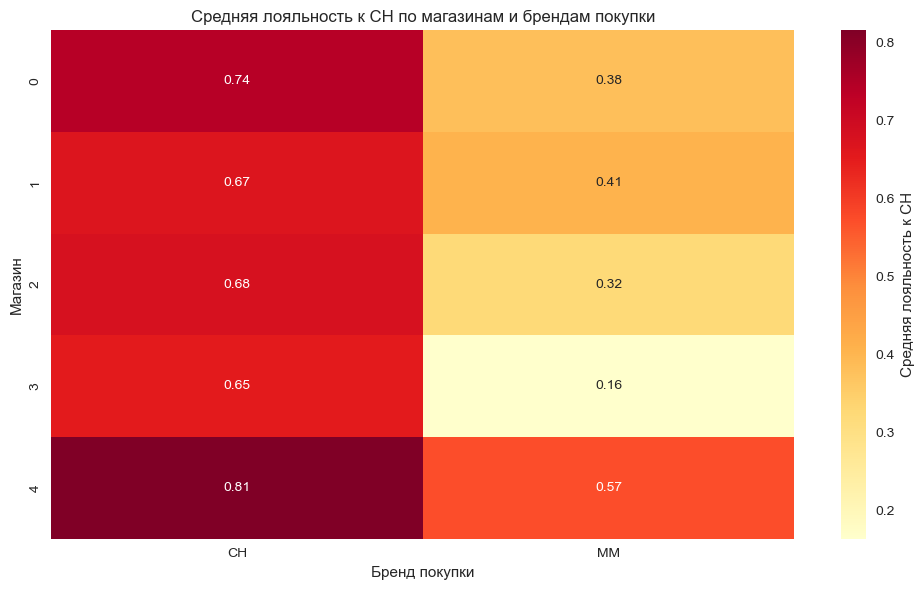

Сводная таблица (средняя лояльность к CH):


Purchase,CH,MM
STORE,,
0,0.740469,0.380821
1,0.666965,0.406964
2,0.678150,0.324020
3,0.651900,0.163777
4,0.814963,0.572893


In [15]:
pivot_table = pd.crosstab(juice_df['STORE'], juice_df['Purchase'], 
                         values=juice_df['LoyalCH'], 
                         aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlOrRd', fmt='.2f', 
            cbar_kws={'label': 'Средняя лояльность к CH'})
plt.title('Средняя лояльность к CH по магазинам и брендам покупки')
plt.xlabel('Бренд покупки')
plt.ylabel('Магазин')
plt.tight_layout()
plt.show()

print("Сводная таблица (средняя лояльность к CH):")
display(pivot_table)